In [93]:
#import various libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from sklearn import svm
#read the pre-processed csv file from the folder
fruad = pd.read_csv('C:\\Users\\chitra\\Desktop\\TU-Delft\\Cyber Data Analytics\\smote1.csv')
fruad.iloc[0]

C:\Users\chitra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


bin                               530056
amount                             64800
cardverificationcodesupplied           1
cvcresponsecode                        7
label                                  1
CardId                            184798
txvariantcode                   mccredit
countryCodeDifference                  0
NormalizedAmount                   0.648
shopperinteraction                     1
txvariantcode.1                 mccredit
Name: 0, dtype: object

In [94]:
fruad.label.value_counts()
#use the required variables from the above list
model_variables = ['cardverificationcodesupplied', 'cvcresponsecode','CardId','countryCodeDifference','shopperinteraction','txvariantcode.1','NormalizedAmount','label']
fruad_data_relevent = fruad[model_variables]
fruad_relevant_enconded = pd.get_dummies(fruad_data_relevent)

In [95]:
#split the dataset into training and testing features. the target represents the labels where 1 represents fraud and 0 represnts non fraud
training_features, test_features, training_target, test_target, = train_test_split(fruad_relevant_enconded.drop(['label'], axis=1),
                                               fruad_relevant_enconded['label'],
                                               test_size = .2)

In [96]:
#smote the dataset
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(training_features, training_target)
print('data after SMOTING.........')
print(training_target.value_counts(), np.bincount(y_res))

C:\Users\chitra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


data after SMOTING.........
0    232027
1       278
Name: label, dtype: int64 [232027 232027]


In [97]:
#retraining the smoted dataset
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .1)

In [98]:
#classifier 1
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#classifier 1
clf_rf = LinearDiscriminantAnalysis()


#smoted data
print('SMOTED data....')
clf_rf.fit(x_train_res, y_train_res)
print(clf_rf.score(x_val_res, y_val_res))
print(precision_recall_fscore_support(y_val_res, clf_rf.predict(x_val_res) , average='macro'))
pred_lda = clf_rf.predict(x_val_res)
#unsmoted data
print('UNSMOTED data...')
clf_rf.fit(training_features, training_target)
print(clf_rf.score(test_features, test_target))
print(precision_recall_fscore_support(test_target, clf_rf.predict(test_features) , average='macro'))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val_res, pred_lda ))

SMOTED data....


C:\Users\chitra\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.8686807740378399
(0.8857241349870384, 0.8692483702612397, 0.8673361214657942, None)
UNSMOTED data...
0.9935602734301014
(0.5103840002381919, 0.5495323760442744, 0.5164259096424694, None)
[[17820  5508]
 [  586 22492]]


In [99]:
#classifier 2
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors
#change the values of n_neighbors, to see variations. (eg n=6,3,7,etc)
clf_rf = neighbors.KNeighborsClassifier(n_neighbors=3)

#smoted data
print('SMOTED data...')
clf_rf.fit(x_train_res, y_train_res)
print(clf_rf.score(x_val_res, y_val_res))
print(precision_recall_fscore_support(y_val_res, clf_rf.predict(x_val_res) , average='micro'))
pred_knn = clf_rf.predict(x_val_res)
#unsmoted data
print('UNSMOTED data...')
clf_rf.fit(training_features, training_target)
print(clf_rf.score(test_features, test_target))
print(precision_recall_fscore_support(test_target, clf_rf.predict(test_features) , average='macro'))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val_res, pred_knn ))

SMOTED data...
0.8794336939188898
(0.8794336939188898, 0.8794336939188898, 0.8794336939188898, None)
UNSMOTED data...
0.9988291406236548
(0.7267388520273169, 0.5372617176143073, 0.5638096525618493, None)
[[19866  3462]
 [ 2133 20945]]


In [100]:
#classifier 3
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=15, random_state=12)
print('SMOTED data...')
clf_rf.fit(x_train_res, y_train_res)
print(clf_rf.score(x_val_res, y_val_res))
print(precision_recall_fscore_support(y_val_res, clf_rf.predict(x_val_res) , average='macro'))
pred_rd = clf_rf.predict(x_val_res)
#unsmoted data
print('UNSMOTED data...')
clf_rf.fit(training_features, training_target)
print(clf_rf.score(test_features, test_target))
print(precision_recall_fscore_support(test_target, clf_rf.predict(test_features) , average='macro'))
#confsuion matrix 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val_res, pred_rd ))

SMOTED data...
0.9975434211093394
(0.9975398373868488, 0.997549618809284, 0.9975433772863161, None)
UNSMOTED data...
0.9986569554212511
(0.4994230702993146, 0.4999051887605585, 0.4996640132327096, None)
[[23244    84]
 [   30 23048]]


In [101]:
#extra classifier to test

from sklearn.naive_bayes import GaussianNB
clf_rf = GaussianNB()
print('SMOTED data...')
a = clf_rf.fit(x_train_res, y_train_res)
print(clf_rf.score(x_val_res, y_val_res))
print(precision_recall_fscore_support(y_val_res, clf_rf.predict(x_val_res) , average='macro'))
pred_nb = clf_rf.predict(x_val_res)
#unsmoted data
print('UNSMOTED data...')
clf_rf.fit(training_features, training_target)
print(clf_rf.score(test_features, test_target))
print(precision_recall_fscore_support(test_target, clf_rf.predict(test_features) , average='macro'))
#confusion matrix 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val_res, pred_nb ))

SMOTED data...
0.8156488385122613
(0.8236277394337964, 0.8160698959905877, 0.8146403271834673, None)
UNSMOTED data...
0.9988119221034144
(0.4994231597072751, 0.49998276159282884, 0.4997028039798424, None)
[[17214  6114]
 [ 2441 20637]]


In [102]:
#ROC plots and to predict AUC scores for every ROC.
import numpy as np
from sklearn.metrics import roc_auc_score
#for all the 4 classifiers
roc_auc_nb = roc_auc_score(y_val_res, pred_nb)
roc_auc_lda = roc_auc_score(y_val_res, pred_lda)
roc_auc_knn = roc_auc_score(y_val_res, pred_knn)
roc_auc_rd = roc_auc_score(y_val_res, pred_rd)


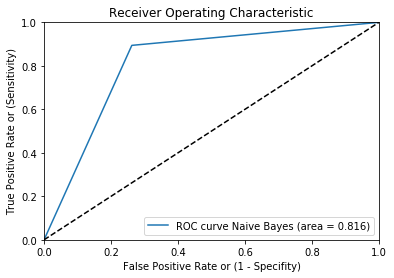

In [107]:
#import libraries and adjusting classes.
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize
y = fruad_relevant_enconded['label']
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]

#uncomment the following according to the classifier
fpr, tpr, thresholds = roc_curve(y_val_res, pred_nb)
#fpr, tpr, thresholds = roc_curve(y_val_res, pred_lda)
#fpr, tpr, thresholds = roc_curve(y_val_res, pred_knn)
#fpr, tpr, thresholds = roc_curve(y_val_res, pred_rd)
#roc_auc = auc(y_val_res, pred_nb,reorder=True)

#uncomment the below lines in order to see the ROC for each classifier
plt.plot(fpr, tpr, label='ROC curve Naive Bayes (area = %0.3f)' % roc_auc_nb)
#plt.plot(fpr, tpr, label='ROC curve LDA (area = %0.3f)' % roc_auc_lda)
#plt.plot(fpr, tpr, label='ROC curve KNN (area = %0.3f)' % roc_auc_knn)
#plt.plot(fpr, tpr, label='ROC curve Random Forest (area = %0.3f)' % roc_auc_rd)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


In [108]:
#preprocessing for Cross Validation
#leave one out method - test_features and test_target are used as testing samples and testing labels resp.
training_features, test_features, training_target, test_target, = train_test_split(fruad_relevant_enconded.drop(['label'], axis=1),
                                               fruad_relevant_enconded['label'],
                                               test_size = .1)
sm = SMOTE(random_state=12, ratio = 1.0)
x_res, y_res = sm.fit_sample(training_features, training_target)
print(training_target.value_counts(), np.bincount(y_res))

x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x_res,
                                                    y_res,
                                                    test_size = .1)


C:\Users\chitra\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


0    261032
1       311
Name: label, dtype: int64 [261032 261032]


In [109]:
#NB classifier for cross-validation (white box)
from sklearn.naive_bayes import GaussianNB
clf_rf = GaussianNB()
from sklearn.model_selection import cross_val_score
from sklearn import cross_validation
#change the values of n_neighbors, to see variations. (eg n=6,3,7,etc)
clf_rf = neighbors.KNeighborsClassifier(n_neighbors=6)
scores = cross_val_score(clf_rf, fruad_relevant_enconded.drop(['label'], axis=1), fruad_relevant_enconded['label'], cv=10)
print(scores)
print(sum(scores)/len(scores))

#uncomment tocalculate precision and recall
#cross_validation.cross_val_score(clf_rf, fruad_relevant_enconded.drop(['label'], axis=1), fruad_relevant_enconded['label'], cv=10, scoring="recall")
#cross_validation.cross_val_score(clf_rf, fruad_relevant_enconded.drop(['label'], axis=1), fruad_relevant_enconded['label'], cv=10, scoring="precision")


[0.99872585 0.99858811 0.99879472 0.99879472 0.99879472 0.99882912
 0.99882912 0.99882908 0.99882908 0.99882908]
0.9987843611443983


In [110]:
#random forest classifier for cROSS-VAlidation (black box)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=15, random_state=12)
scores = cross_val_score(clf_rf, fruad_relevant_enconded.drop(['label'], axis=1), fruad_relevant_enconded['label'], cv=10)
print(scores)
print(sum(scores)/len(scores))

#uncomment to calculate precision and recall
#cross_validation.cross_val_score(clf_rf, fruad_relevant_enconded.drop(['label'], axis=1), fruad_relevant_enconded['label'], cv=10, scoring="recall")
#cross_validation.cross_val_score(clf_rf, fruad_relevant_enconded.drop(['label'], axis=1), fruad_relevant_enconded['label'], cv=10, scoring="precision")


[0.64750852 0.99514446 0.99858811 0.99879472 0.99879472 0.99882912
 0.99882912 0.99882908 0.99882908 0.9983125 ]
0.9632459437293198


In [111]:
# LDA for cross-validation (black-box)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_rf = LinearDiscriminantAnalysis()
scores = cross_val_score(clf_rf, fruad_relevant_enconded.drop(['label'], axis=1), fruad_relevant_enconded['label'], cv=10)
print(scores)
print(sum(scores)/len(scores))


C:\Users\chitra\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\chitra\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\chitra\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\chitra\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\chitra\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\chitra\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\chitra\

[0.52942594 0.97251971 0.99190743 0.99862254 0.99879472 0.99882912
 0.99872581 0.99882908 0.99507525 0.9853635 ]
0.9468093119273716


C:\Users\chitra\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
